In [6]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from scipy.stats import gaussian_kde

from classes.Pesquisador import Pesquisador
from classes.Escopo import Escopo

In [ ]:
# Abelém: 0000-0003-4085-6674 (36)
# Aldebaro: 0000-0001-7773-2080 (54)
# Sandro: 0000-0002-8929-5145 (30)
# Reginaldo: 0000-0002-0456-8547 (29)
# Vanderlei Salvador Bagnato: 0000-0003-4833-239X (459)
# Ricardo Gazzinelli : 0000-0003-2427-7699 (276)
# Monica Marques: 0000-0001-6906-8327 (148)

In [7]:
p = Pesquisador('0000-0002-0456-8547', verbose = True)

Download do ORCID ID: 0000-0002-0456-8547 (Concluído)


IntProgress(value=0, description='Progresso:', max=29)

### Novas visualizações

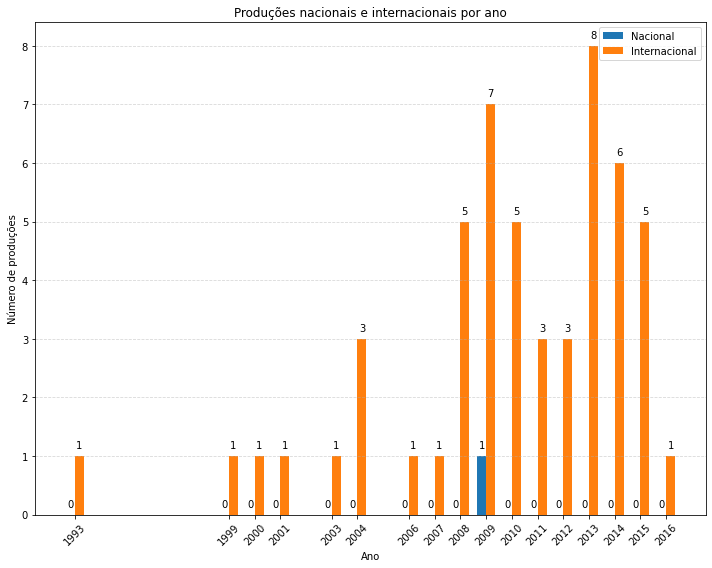

In [4]:
anos = sorted(set(map(lambda x: int(x.ano), p.producoes)))

# Inicializa os contadores com 0 para todos os anos
inter = {ano: 0 for ano in anos}
nac = {ano: 0 for ano in anos}

# Conta produções por ano e escopo
for prod in p.producoes:
    ano = int(prod.ano)
    if prod.escopo == Escopo.INTERNACIONAL:
        inter[ano] += 1
    else:
        nac[ano] += 1

# Conversão para listas ordenadas
anos_array = np.array(anos)
nac_values = [nac[ano] for ano in anos]
inter_values = [inter[ano] for ano in anos]

# Plot
w = 0.35  # largura das barras
fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(anos_array - w/2, nac_values, width = w, label = 'Nacional', color='#1f77b4')
ax.bar(anos_array + w/2, inter_values, width = w, label = 'Internacional', color='#ff7f0e')

# Melhorias visuais
ax.set_xticks(anos_array)
ax.set_xticklabels(anos, rotation = 45)
ax.set_ylabel('Número de produções')
ax.set_xlabel('Ano')
ax.set_title('Produções nacionais e internacionais por ano')
ax.legend()
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# Adiciona rótulos nos topos das barras
for i, (n, inter_) in enumerate(zip(nac_values, inter_values)):
    ax.text(anos_array[i] - w/2, n + 0.1, str(n), ha='center', va='bottom', fontsize = 10)
    ax.text(anos_array[i] + w/2, inter_ + 0.1, str(inter_), ha='center', va='bottom', fontsize = 10)

plt.tight_layout()
plt.show()


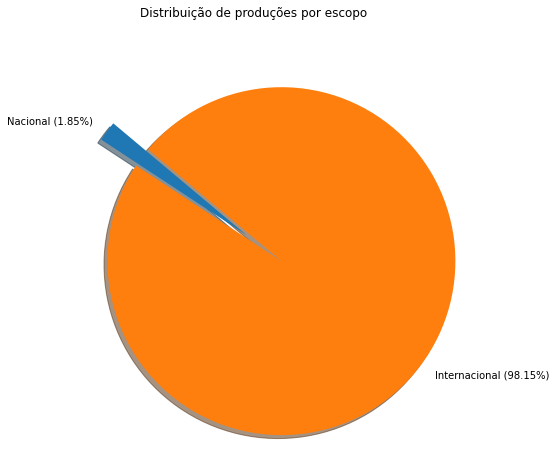

In [5]:
# Conta total de produções por escopo
total_nac = sum(1 for prod in p.producoes if prod.escopo == Escopo.NACIONAL)
total_inter = sum(1 for prod in p.producoes if prod.escopo == Escopo.INTERNACIONAL)

# Dados para o gráfico
labels = [f'Nacional ({np.round(total_nac / (total_nac + total_inter) * 100, 2)}%)', f'Internacional ({np.round(total_inter / (total_nac + total_inter) * 100, 2)}%)']
sizes = [total_nac, total_inter]
colors = ['#1f77b4', '#ff7f0e']  # azul e laranja
explode = (0.05, 0.2)  # separa levemente as fatias

# Plot
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(
    sizes,
    labels = labels,
    # autopct = '%1.2f%%',
    startangle = 140,
    colors = colors,
    explode = explode,
    shadow = True
)
ax.set_title('Distribuição de produções por escopo')
plt.show()

In [6]:
posicoes_por_ano = defaultdict(list)
posicoes = []
for prod in p.producoes:
    for i, nome in enumerate(prod.autores):
        if nome in p.nome:
            posicoes_por_ano[prod.ano].append(i + 1)
            posicoes.append(i + 1)

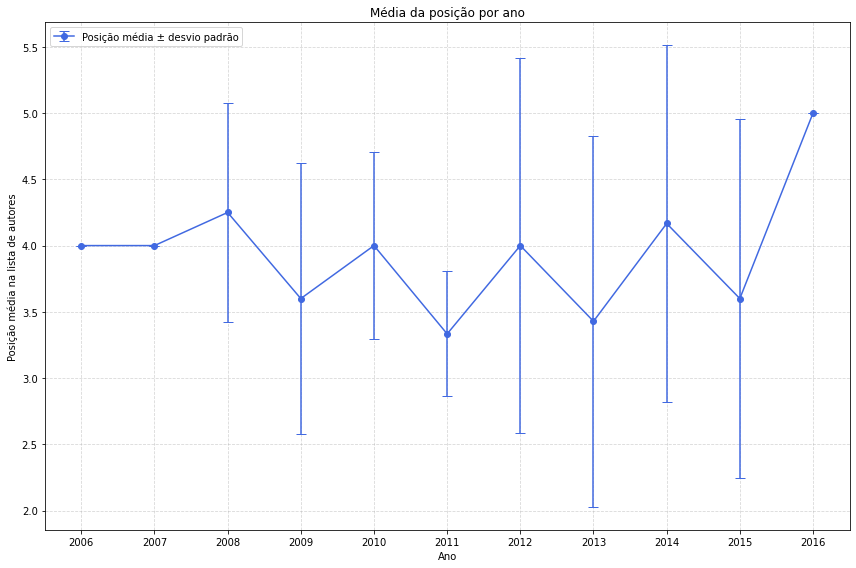

In [7]:
# Calcula médias e desvios padrão
anos = sorted(posicoes_por_ano.keys())
medias = [np.mean(posicoes_por_ano[ano]) for ano in anos]
desvios = [np.std(posicoes_por_ano[ano]) for ano in anos]

# Plotando com barras de erro
plt.figure(figsize = (12, 8))
plt.errorbar(anos, medias, yerr = desvios, fmt = 'o-', color = 'royalblue', capsize = 5, label = 'Posição média ± desvio padrão')
plt.title('Média da posição por ano')
plt.xlabel('Ano')
plt.ylabel('Posição média na lista de autores')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

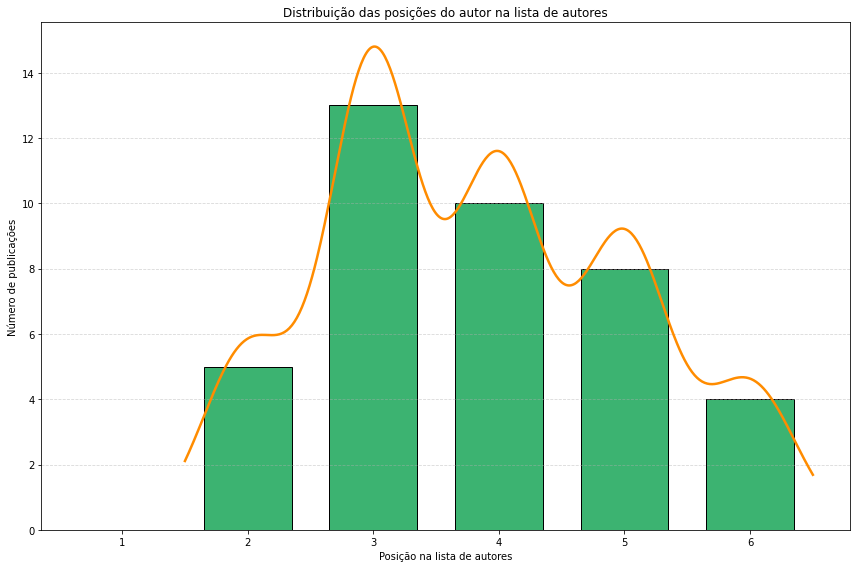

In [8]:
# Plotando o histograma
fig, ax = plt.subplots(figsize = (12, 8))
bins = range(1, max(posicoes) + 2)  # bin para cada posição possível

ax.hist(posicoes, bins = bins, align = 'left', rwidth = 0.7, color = 'mediumseagreen', edgecolor = 'black')

# Estima a densidade (curva suavizada)
posicoes_array = np.array(posicoes)
kde = gaussian_kde(posicoes_array, bw_method=0.3)  # ajuste o parâmetro se quiser mais ou menos suavização

# Gera pontos para plotar a curva
x_vals = np.linspace(min(posicoes_array)-0.5, max(posicoes_array)+0.5, 500)
y_vals = kde(x_vals) * len(posicoes_array) * (bins[1] - bins[0])  # normaliza para alinhar com histograma

# Plota a curva suavizada
ax.plot(x_vals, y_vals, color='darkorange', lw=2.5, label='Curva suavizada (KDE)')


plt.xticks(bins[:-1])
plt.xlabel('Posição na lista de autores')
plt.ylabel('Número de publicações')
plt.title('Distribuição das posições do autor na lista de autores')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

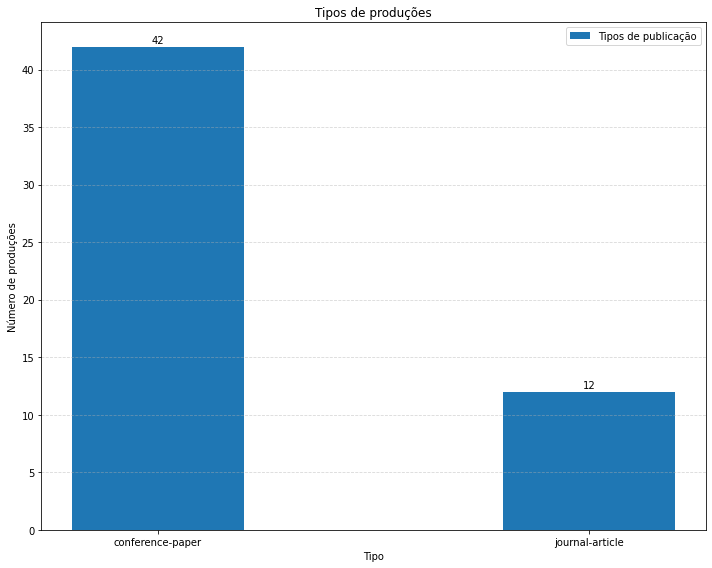

In [10]:
tipos = set(map(lambda x: x.tipo, p.producoes))

dados = {tipo: 0 for tipo in tipos}

for prod in p.producoes:
    dados[prod.tipo] += 1

fig, ax = plt.subplots(figsize = (10, 8))

ax.bar(dados.keys(), dados.values(), width = .4, label = 'Tipos de publicação', color='#1f77b4')

#ax.set_xticks(anos_array)
# ax.set_xticklabels(anos, rotation = 45)
ax.set_ylabel('Número de produções')
ax.set_xlabel('Tipo')
ax.set_title('Tipos de produções')
ax.legend()
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# # # Adiciona rótulos nos topos das barras
for i, (key, value) in enumerate(zip(dados.keys(), dados.values())):
    ax.text(i, value + 0.1, str(value), ha = 'center', va = 'bottom', fontsize = 10)
    
    
plt.tight_layout()
plt.show()

### Fast test

In [1]:
def getData(orcid_id):
    url = f"https://pub.orcid.org/v3.0/{orcid_id}"

    headers = {
        "Accept": "application/json"
    }

    response = requests.get(url, headers=headers)

    return response.json() if response.status_code == 200 else response.status_code

In [4]:
id = "0000-0002-0456-8547"
data = getData(id)

In [5]:
data

{'orcid-identifier': {'uri': 'https://orcid.org/0000-0002-0456-8547',
  'path': '0000-0002-0456-8547',
  'host': 'orcid.org'},
 'preferences': {'locale': 'en'},
 'history': {'creation-method': 'MEMBER_REFERRED',
  'completion-date': None,
  'submission-date': {'value': 1472670441376},
  'last-modified-date': {'value': 1753013725813},
  'claimed': True,
  'source': None,
  'deactivation-date': None,
  'verified-email': True,
  'verified-primary-email': True},
 'person': {'last-modified-date': {'value': 1640881414742},
  'name': {'created-date': {'value': 1472670441664},
   'last-modified-date': {'value': 1472670441664},
   'given-names': {'value': 'Reginaldo'},
   'family-name': {'value': 'Santos'},
   'credit-name': None,
   'source': None,
   'visibility': 'public',
   'path': '0000-0002-0456-8547'},
  'other-names': {'last-modified-date': None,
   'other-name': [],
   'path': '/0000-0002-0456-8547/other-names'},
  'biography': None,
  'researcher-urls': {'last-modified-date': {'value

In [135]:
data['activities-summary']['works']['group'][38]['work-summary'][0]

{'put-code': 24562540,
 'created-date': {'value': 1465304495305},
 'last-modified-date': {'value': 1653439835069},
 'source': {'source-orcid': None,
  'source-client-id': {'uri': 'https://orcid.org/client/0000-0003-1377-5676',
   'path': '0000-0003-1377-5676',
   'host': 'orcid.org'},
  'source-name': {'value': 'ResearcherID'},
  'assertion-origin-orcid': {'uri': 'https://orcid.org/0000-0001-7773-2080',
   'path': '0000-0001-7773-2080',
   'host': 'orcid.org'},
  'assertion-origin-client-id': None,
  'assertion-origin-name': {'value': 'Aldebaro Klautau'}},
 'title': {'title': {'value': 'Technologies for the Development of Spoken Dialog Systems in Brazilian Portuguese'},
  'subtitle': None,
  'translated-title': None},
 'external-ids': {'external-id': [{'external-id-type': 'doi',
    'external-id-value': '10.1109/STIL.2009.20',
    'external-id-normalized': {'value': '10.1109/stil.2009.20',
     'transient': True},
    'external-id-normalized-error': None,
    'external-id-url': None,
 

In [136]:
doi = "10.1109/STIL.2009.20"

url = f"https://api.crossref.org/works/{doi}"
cdata = requests.get(url).json()
authors = cdata['message'].get('author', [])
autores = []
for author in authors:
    autores.append(f"{author.get('given', '')} {author.get('family', '')}")
    
issn = cdata['message'].get('ISSN', '')
issn = '' if len(issn) == 0 else issn[0]

In [137]:
cdata['message']

{'indexed': {'date-parts': [[2024, 9, 5]],
  'date-time': '2024-09-05T13:36:21Z',
  'timestamp': 1725543381609},
 'reference-count': 5,
 'publisher': 'IEEE',
 'content-domain': {'domain': [], 'crossmark-restriction': False},
 'short-container-title': [],
 'published-print': {'date-parts': [[2009]]},
 'DOI': '10.1109/stil.2009.20',
 'type': 'proceedings-article',
 'created': {'date-parts': [[2011, 3, 18]],
  'date-time': '2011-03-18T13:31:33Z',
  'timestamp': 1300455093000},
 'page': '187-190',
 'source': 'Crossref',
 'is-referenced-by-count': 0,
 'title': ['Technologies for the Development of Spoken Dialog Systems in Brazilian Portuguese'],
 'prefix': '10.1109',
 'author': [{'given': 'Jefferson Magalhães de',
   'family': 'Morais',
   'sequence': 'first',
   'affiliation': []},
  {'given': 'Nelson Cruz Samapaio',
   'family': 'Neto',
   'sequence': 'additional',
   'affiliation': []},
  {'given': 'Aldebaro Barreto da Rocha',
   'family': 'Klautau Jr',
   'sequence': 'additional',
   'a